In [ ]:
pip install comet_ml -q

     |████████████████████████████████| 441 kB 19.9 MB/s 
     |████████████████████████████████| 54 kB 602 kB/s 
     |████████████████████████████████| 168 kB 52.4 MB/s 
     |████████████████████████████████| 498 kB 53.3 MB/s 
     |████████████████████████████████| 130 kB 63.1 MB/s 
     |████████████████████████████████| 54 kB 1.2 MB/s 
     |████████████████████████████████| 140 kB 39.9 MB/s 
     |████████████████████████████████| 127 kB 46.0 MB/s 
     |████████████████████████████████| 168 kB 9.8 MB/s 
     |████████████████████████████████| 166 kB 24.6 MB/s 
     |████████████████████████████████| 166 kB 55.2 MB/s 
     |████████████████████████████████| 162 kB 56.8 MB/s 
     |████████████████████████████████| 162 kB 53.8 MB/s 
     |████████████████████████████████| 158 kB 48.6 MB/s 
     |████████████████████████████████| 157 kB 57.2 MB/s 
     |████████████████████████████████| 157 kB 28.4 MB/s 
     |████████████████████████████████| 157 kB 41.2 MB/s 
     |█████████████

In [ ]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key=os.environ.get('COMET_API_KEY'),
    project_name="ml-models",
    workspace="mmd6020-projet-pratique",
)

ModuleNotFoundError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Data Exploration

In [7]:
RANDOM_SEED = 42

In [5]:
# source of dataset: https://ieee-dataport.org/open-access/preprocessed-chb-mit-scalp-eeg-database
data_df = pd.read_csv('/content/drive/MyDrive/MMD6020_Final_Project/data/processed/chbmit_preprocessed_data.csv')

In [6]:
data_df.head()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0


In [8]:
data_df.shape

(2097150, 24)

In [9]:
# Check for class imbalance
data_df[data_df['Outcome'] == 1].shape[0]/data_df.shape[0]

0.5

In [10]:
data_df.shape[0]/(256*2)

4095.99609375

In [11]:
timepoints = list(data_df.index)

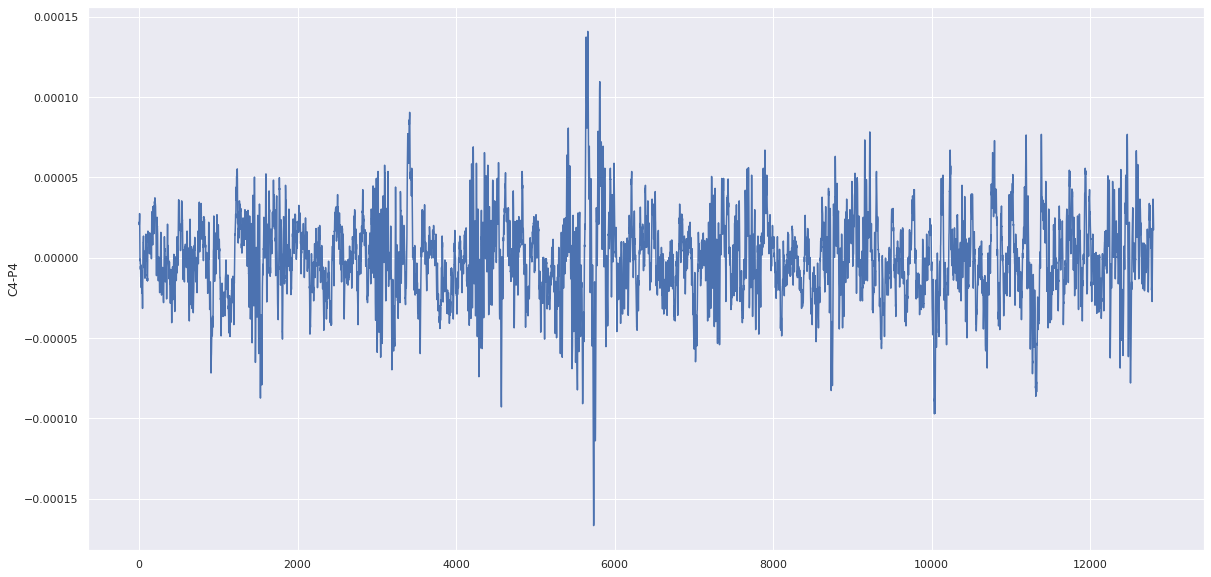

In [12]:
# Plot time series
sec = 50
plt.figure(figsize=(20, 10))
sns.lineplot(data=data_df[:256*sec], x=timepoints[:256*sec], y=data_df.iloc[:256*sec,2])

In [14]:
y = data_df['Outcome']
X = data_df.drop(['Outcome'], axis=1)

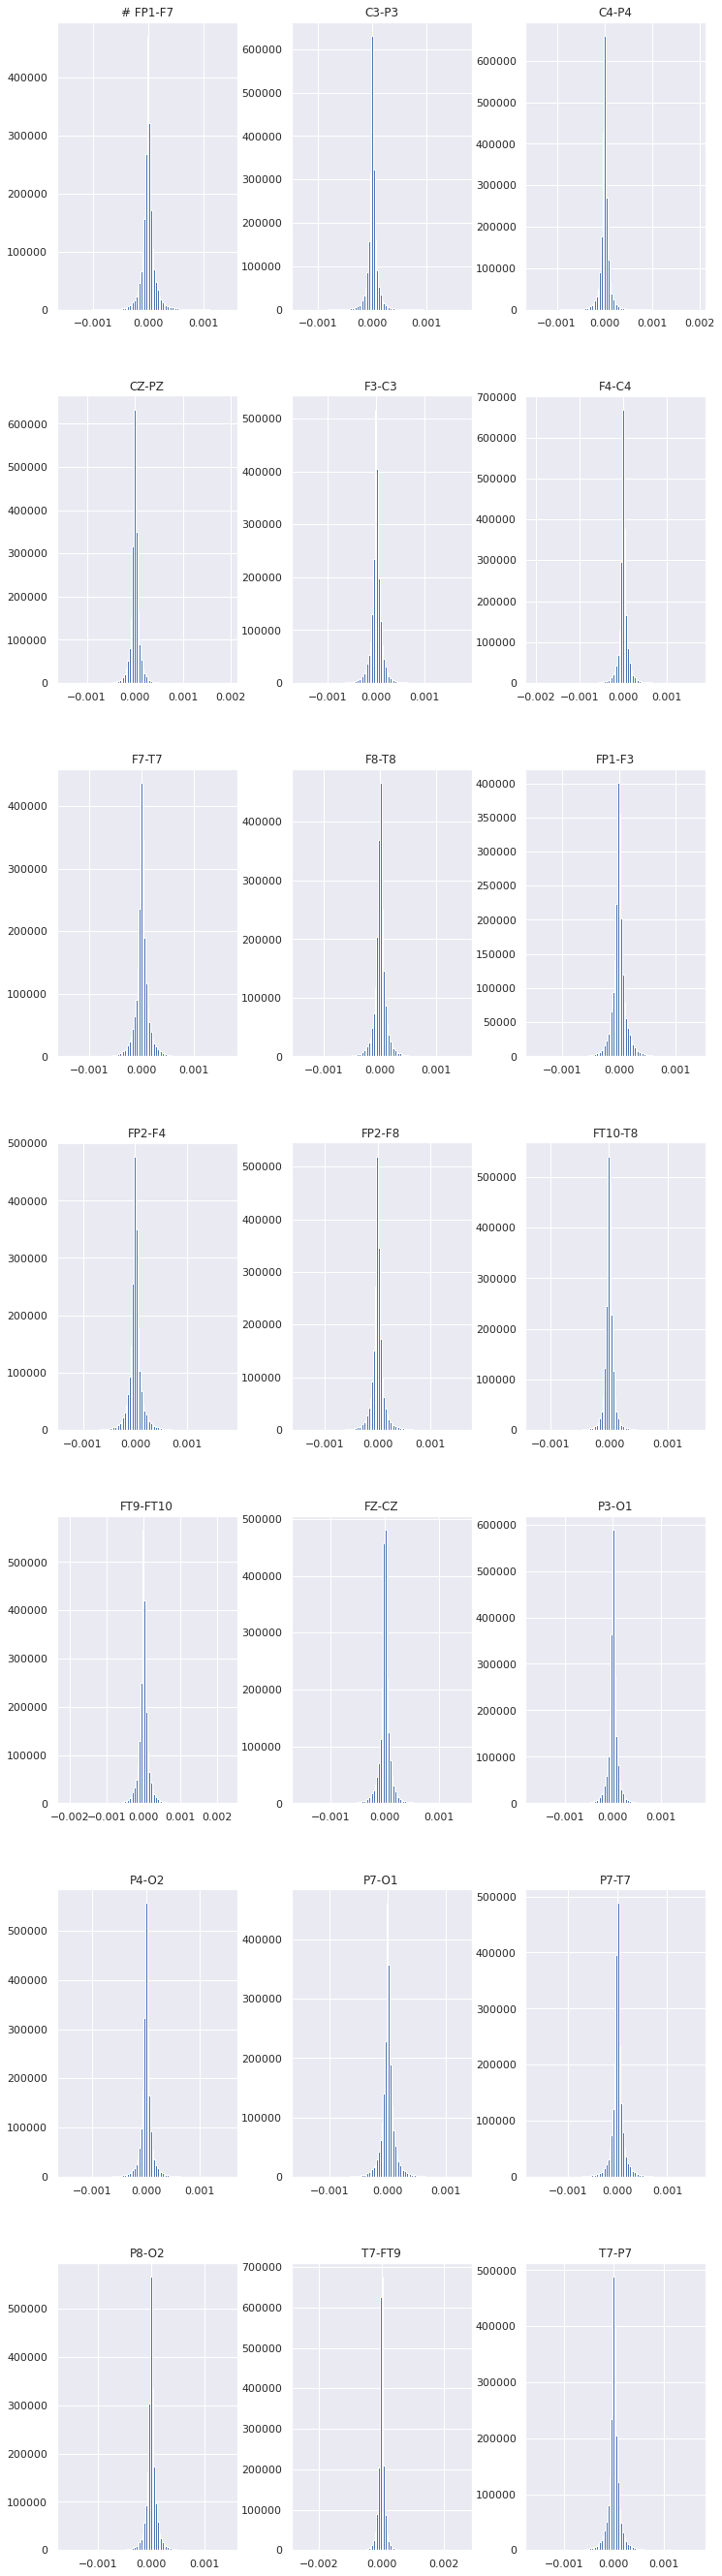

In [ ]:
import matplotlib.pyplot as plt
# Visualize data distribution for each channel

fig, axes = plt.subplots(len(X.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X.hist(column = X.columns[i], bins = 100, ax=axis)
        i = i+1

In [15]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% training, 10% validation, 10% testing
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=RANDOM_SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5, stratify=y_val_test, random_state=RANDOM_SEED)

In [16]:
X_train.shape, X_val.shape, X_test.shape

((1677720, 23), (209715, 23), (209715, 23))

In [17]:
y_train.shape, y_val.shape, y_test.shape

((1677720,), (209715,), (209715,))

# **Feature Selection**

## 1. PCA

In [ ]:
# 1. PCA
from sklearn.decomposition import PCA

n_components = 12
pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_val_PCA = pca.transform(X_val)

X_train_PCA = pd.DataFrame(data = X_train_PCA, columns = [f'PC{i}' for i in range(1, n_components+1)])
X_val_PCA = pd.DataFrame(data = X_val_PCA, columns = [f'PC{i}' for i in range(1, n_components+1)])
cev = np.cumsum(pca.explained_variance_ratio_)
cev = np.insert(cev, 0, 0)
print(f'Cumulative explained variance with {n_components} components: {cev[-1]}')
plt.figure(figsize=(15,10))
plt.ylim(0.0,1.1)
plt.plot(cev, linewidth=3)
plt.xlabel('number of components', fontsize=21)
plt.ylabel('cumulative explained variance', fontsize=21)
plt.title('Scree Plot using PCA', fontsize=24)
plt.rc('font', size=16)
plt.grid()
plt.show()

## 2. Lasso (doesn't work)

In [ ]:
from sklearn.svm import LinearSVC

from sklearn.feature_selection import SelectFromModel

# Lasso SVC
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)

# Select features based on Lasso
selector = SelectFromModel(lsvc)

selector.fit(X,y)

print('Selected Support : ', selector.get_support())

print('Selected Features: ', X_train.columns[selector.get_support()])


features = selector.transform(X)
print('Selected Features shape: ', features.shape)

Selected Support :  [False False False False False False False False False False False False
 False False False False False False False False False False False]
Selected Features:  Index([], dtype='object')
Selected Features shape:  (2097150, 0)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_base.py:99: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning,


## 3. Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=250)
rfe = RFE(model, n_features_to_select=12)
selector = rfe.fit(X, y)

print("Num Features: ", selector .n_features_)
print("Selected Features Mask: ", selector .support_)
print("Feature Ranking: ", selector .ranking_)

#Selected feature names
print('Selected feature names: ', X_train.columns[selector .support_])

Num Features:  12
Selected Features Mask:  [False  True  True  True False  True  True False  True False  True False
 False  True False False  True False False  True False  True  True]
Feature Ranking:  [ 9  1  1  1 11  1  1  5  1  2  1 12  6  1  4  3  1  7 10  1  8  1  1]
Selected feature names:  Index(['C3-P3', 'C4-P4', 'CZ-PZ', 'F4-C4', 'F7-T7', 'FP1-F3', 'FP2-F8',
       'FZ-CZ', 'P7-O1', 'T7-FT9', 'T8-P8-0', 'T8-P8-1'],
      dtype='object')


## 4. Select KBest

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

selector = SelectKBest(score_func=mutual_info_classif, k=12)
selector.fit(X_train, y_train)

print(selector.scores_)

[0.07857704 0.09549928 0.11579158 0.11130954 0.10769067 0.10198813
 0.10410565 0.07759246 0.07771306 0.07765047 0.06951842 0.06753558
 0.10649828 0.10698046 0.08337152 0.09612963 0.10225952 0.10908188
 0.08704556 0.08945703 0.11019246 0.08817562 0.08823389]


In [ ]:
#Selected feature names
print(X_train.columns[selector.scores_.argsort()[::-1][:12]])

Index(['C4-P4', 'CZ-PZ', 'T7-P7', 'P7-T7', 'F3-C3', 'FZ-CZ', 'FT9-FT10',
       'F7-T7', 'P7-O1', 'F4-C4', 'P4-O2', 'C3-P3'],
      dtype='object')


# Curves

In [ ]:
from sklearn.metrics import roc_curve, auc

colors = ['red', 'blue', 'green', 'yellow', 'orange']

def plot_ROC(classifiers_tuple, plot_name, add_random=True):

    plt.figure(figsize=(8, 8))

    for count, classifier in enumerate(classifiers_tuple):

        
        clf = classifier[0]
        clf_name = classifier[1]
        X = classifier[2]
        y = classifier[3]

        y_pred = clf.predict_proba(X)[:,1]
        fpr, tpr, _ = roc_curve(y.ravel(), y_pred.ravel())
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=colors[count], label=f"{clf_name}: AUC = %0.2f" % roc_auc)
        plt.xlabel("1 - Specificity")
        plt.ylabel("Sensitivity")
        plt.title("ROC Curves")

    if add_random:
        plt.plot([0, 1], [0, 1], color="black", label='Random Uniform (AUC = 0.5)', linestyle="--")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc="lower right")

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

KeyboardInterrupt: ignored

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA

n_components = 12
selector = PCA(n_components=n_components)
# selector = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False, random_state=RANDOM_SEED), prefit=False)

clf_adaboost = AdaBoostClassifier(random_state=RANDOM_SEED)

steps = [('selector', selector), ("clf_adaboost", clf_adaboost)]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)

KeyboardInterrupt: ignored

# Simple Model

In [24]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state=RANDOM_SEED)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79    104857
         1.0       0.81      0.75      0.78    104858

    accuracy                           0.79    209715
   macro avg       0.79      0.79      0.79    209715
weighted avg       0.79      0.79      0.79    209715



In [ ]:
from sklearn.svm import SVC

# Will take forever
clf1 = SVC()
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_val)
print(classification_report(y_val, y_pred))

In [ ]:
import xgboost as xgb

# 1000 times faster on GPU
clf2 = xgb.XGBClassifier()
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_val)
print(classification_report(y_val, y_pred))

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf3 = LogisticRegression(random_state=RANDOM_SEED)
clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51    104857
         1.0       0.51      0.50      0.50    104858

    accuracy                           0.51    209715
   macro avg       0.51      0.51      0.51    209715
weighted avg       0.51      0.51      0.51    209715



In [20]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=150, random_state=RANDOM_SEED)
clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91    104857
         1.0       0.92      0.89      0.91    104858

    accuracy                           0.91    209715
   macro avg       0.91      0.91      0.91    209715
weighted avg       0.91      0.91      0.91    209715



In [21]:
from sklearn.metrics import roc_curve, auc

colors = ['red', 'blue', 'green', 'yellow', 'orange']

def plot_ROC(classifiers_tuple, plot_name, add_random=True):

    plt.figure(figsize=(8, 8))

    for count, classifier in enumerate(classifiers_tuple):

        
        clf = classifier[0]
        clf_name = classifier[1]
        X = classifier[2]
        y = classifier[3]

        y_pred = clf.predict_proba(X)[:,1]
        fpr, tpr, _ = roc_curve(y.ravel(), y_pred.ravel())
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=colors[count], label=f"{clf_name}: AUC = %0.2f" % roc_auc)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curves")

    if add_random:
        plt.plot([0, 1], [0, 1], color="black", label='Random Uniform (AUC = 0.5)', linestyle="--")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc="lower right")

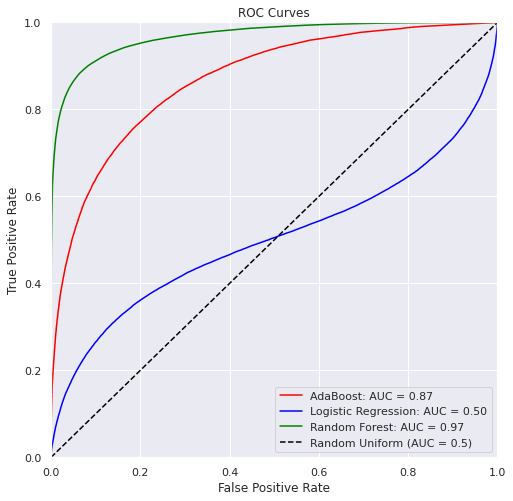

In [25]:
classifiers = [(clf, 'AdaBoost', X_val, y_val),
               (clf3, 'Logistic Regression', X_val, y_val),
               (clf4, 'Random Forest', X_val, y_val)]
plot_ROC(classifiers, plot_name='Testing', add_random=True)